## Stock Market Anomaly Detection Using LSTM Auto Encoders

In [1]:
#import libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import tensorflow
import seaborn as sns
from tensorflow import keras
from keras import layers , Sequential
from keras.layers import  Dense,LSTM,Flatten,Input,Dropout,TimeDistributed,RepeatVector
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import  mean_squared_error

In [2]:
# loading the data and inspecting 
data = pd.read_csv(r'E:\Data Science\RNN-LSTM\GE.csv')
data.shape

(5030, 7)

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df = data[['Date','Close']]
df.head()

,Date,Close
0,2001-06-11,364.615387
1,2001-06-12,375.153839
2,2001-06-13,368.076935
3,2001-06-14,375.846161
4,2001-06-15,375.461548


In [5]:
df['Date'] = pd.to_datetime(df.iloc[:,0])

C:\Users\colombia\AppData\Local\Temp\ipykernel_17048\2386008369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df.iloc[:,0])


In [6]:
df['Date']

0      2001-06-11
1      2001-06-12
2      2001-06-13
3      2001-06-14
4      2001-06-15
          ...    
5025   2021-06-02
5026   2021-06-03
5027   2021-06-04
5028   2021-06-07
5029   2021-06-08
Name: Date, Length: 5030, dtype: datetime64[ns]

<AxesSubplot:xlabel='Date', ylabel='Close'>

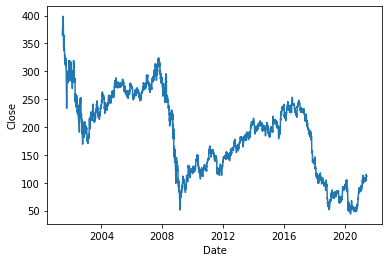

In [7]:
sns.lineplot(x=df['Date'],y=df['Close'])

In [8]:
#Inspecting the time duration
print('Start date is',df['Date'].min())
print('End date is',df['Date'].max() )

Start date is 2001-06-11 00:00:00
End date is 2021-06-08 00:00:00


In [9]:
#Splitting  of data 
train, test = df.loc[df['Date']<='2010-06-09'], df.loc[df['Date']>='2010-06-09']

In [10]:
#scaler  = StandardScaler()

#scaler = scaler.fit(train[['Close']])
scaler = MinMaxScaler(feature_range=(0,1))
# dataset = scaler.fit_transform(train[['Close']])
# train = np.array(train[['Close']])


In [11]:
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.fit_transform(test[['Close']])
#test= np.array(test[['Close']])

C:\Users\colombia\AppData\Local\Temp\ipykernel_17048\1652150156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Close'] = scaler.fit_transform(train[['Close']])
C:\Users\colombia\AppData\Local\Temp\ipykernel_17048\1652150156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Close'] = scaler.fit_transform(test[['Close']])


In [12]:
train['Close']

0       0.901327
1       0.931637
2       0.911283
3       0.933628
4       0.932522
          ...   
2257    0.216593
2258    0.200221
2259    0.193584
2260    0.195133
2261    0.191593
Name: Close, Length: 2262, dtype: float64

In [13]:
size=70
def change_to_seq(x,y,size=1):
    x_values = []
    y_values =[]
    for i in range(len(x)-size):
        x_values.append(x.iloc[i:(i+size)].values)
        y_values.append(y.iloc[i+size])
    return np.array(x_values),np.array(y_values)

# def change_to_seq(x,y,size=1):
#     x_values = []
#     y_values =[]
#     for i in range(len(x)-size):
#         x_values.append(x[i:(i+size)])
#         y_values.append(y[i+size])
#         return np.array(x_values),np.array(y_values)


In [14]:
trainX, trainY = change_to_seq(train[['Close']], train['Close'],size)
testX, testY =change_to_seq(test[['Close']],test['Close'],size)
# trainX, trainY = change_to_seq(train, train, size)
# testX, testY =change_to_seq(test,test,size)

In [25]:
trainX.shape

(2192, 70, 1)

In [16]:
model =Sequential([
    LSTM(128,input_shape=(trainX.shape[1],trainX.shape[2])),
    Dropout(rate = 0.2),
    RepeatVector(trainX.shape[1]),
    LSTM(128, return_sequences =True),
    Dropout(rate=0.2),
    TimeDistributed(Dense(trainX.shape[2]))
    
])

model.compile( 
              loss ='mae',
               optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 70, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 70, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 70, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 70, 1)            129       
 ibuted)                                                

In [17]:
history = model.fit(trainX,trainY, epochs=10, batch_size= 20, validation_split=0.1, verbose=1)

Epoch 1/10
99/99 [==============================] - 17s 123ms/step - loss: 0.1485 - val_loss: 0.3391
Epoch 2/10
99/99 [==============================] - 11s 109ms/step - loss: 0.1204 - val_loss: 0.3326
Epoch 3/10
99/99 [==============================] - 11s 109ms/step - loss: 0.1173 - val_loss: 0.3506
Epoch 4/10
99/99 [==============================] - 12s 119ms/step - loss: 0.1182 - val_loss: 0.3589
Epoch 5/10
99/99 [==============================] - 11s 115ms/step - loss: 0.1158 - val_loss: 0.3672
Epoch 6/10
99/99 [==============================] - 12s 117ms/step - loss: 0.1151 - val_loss: 0.3896
Epoch 7/10
99/99 [==============================] - 12s 117ms/step - loss: 0.1153 - val_loss: 0.3694
Epoch 8/10
99/99 [==============================] - 12s 119ms/step - loss: 0.1149 - val_loss: 0.3637
Epoch 9/10
99/99 [==============================] - 11s 114ms/step - loss: 0.1136 - val_loss: 0.3195
Epoch 10/10
99/99 [==============================] - 11s 115ms/step - loss: 0.1141 - val_lo

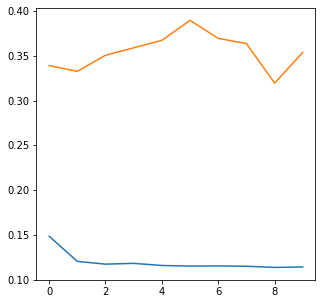

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


85/85 [==============================] - 5s 53ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


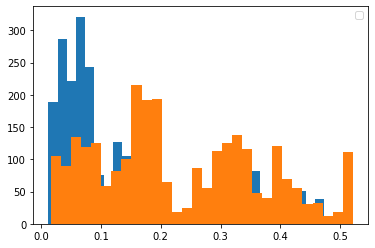

In [19]:
# finding the mean absolute error for trained 
train_predict =  model.predict(trainX)
train_mae = np.mean(np.abs(train_predict - trainX), axis=1)
plt.hist(train_mae, bins =30)

# finding the mean absolute error for test
test_predict = model.predict(testX)
test_mae = np.mean(np.abs(test_predict - testX), axis=1)
plt.hist(test_mae, bins= 30)
plt.legend(loc='upper right')

In [20]:
#
max_train_mae = 0.4

In [21]:
anomaly_df = pd.DataFrame(test[size:])

In [22]:
anomaly_df['test_mae'] = test_mae
anomaly_df['max_train_mae']= max_train_mae
anomaly_df['anomaly'] = anomaly_df['test_mae']>anomaly_df['max_train_mae']
anomaly_df['Close'] =test[size:]['Close']

<AxesSubplot:xlabel='Date', ylabel='test_mae'>

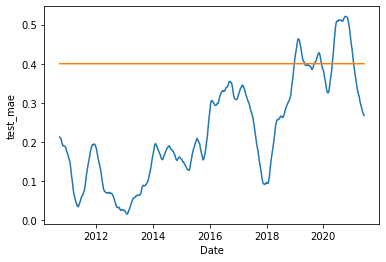

In [23]:
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['test_mae'])
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_train_mae'])